# Analytical solution for a cantilever beam with a single load at the end

© 2023 Daniel F. Ruiz, Exneyder A. Montoya-Araque and Universidad EAFIT.

This notebook can be interactively run in [Google - Colab](https://colab.research.google.com/github/AppliedMechanics-EAFIT/EAFIT_solid_mechanics/blob/main/notebooks/beam_analytic_sol.ipynb).

> Note: Be aware that this notebook follows solid mechanics sign conventions → Tractions are positive, compressions are negative, and shear forces/stresses are positive when they act on the positive $x$-plane and point to the positive $y$-direction.


## Required modules and global setup for plots

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from ipywidgets import widgets as wgt
import sympy as sym
from IPython import get_ipython
from ipywidgets import interact, widgets, FloatSlider, FloatText, fixed
# from ipywidgets.widgets import *
from IPython.display import display, clear_output

if 'google.colab' in str(get_ipython()):
    %pip install ipympl &> ~/pip-log.txt
    from google.colab import output
    output.enable_custom_widget_manager()

%matplotlib widget

plt.style.use("default")
mpl.rcParams.update(
    {
        'figure.constrained_layout.use': True,
        'interactive': False,
        "text.usetex": False,  # Use mathtext, not LaTeX
        "font.family": "cmr10",  # Use the Computer modern font
        "mathtext.fontset": "cm",
        "axes.formatter.use_mathtext": True,
        "axes.unicode_minus": False,
    }
)
html_setup = '<style> div.jupyter-widgets.widget-label {display: none;} </style>'

## Functions

In [2]:
def beam_stress_fields(x, y, load, h, l):
    b = 1
    moi = b * h**3 / 12  # Moment of inertia
    # Stress field
    𝜎_xx = - x * y * load / moi
    𝜎_yy, 𝜎_zz, 𝜏_xz = 0*𝜎_xx, 0*𝜎_xx, 0*𝜎_xx
    𝜏_xy = -(h ** 2 / 4 - y**2) * load / (2 * moi)
    𝜏_yx = 𝜏_xy
    #Principal stresses
    𝜎_m = (𝜎_xx + 𝜎_yy) / 2
    𝜏_max = np.sqrt(((𝜎_xx - 𝜎_yy) / 2) ** 2 + 𝜏_xy ** 2)
    𝜎_1 = 𝜎_m + 𝜏_max
    𝜎_3 = 𝜎_m - 𝜏_max
    # return 𝜎_xx , 𝜎_yy , 𝜏_xy , 𝜎_1 , 𝜎_3 , 𝜎_m, 𝜏_max
    stress_fields = {
        "𝜎_xx": 𝜎_xx,
        "𝜎_yy": 𝜎_yy,
        "𝜏_xy": 𝜏_xy,
        "𝜎_1": 𝜎_1,
        "𝜎_3": 𝜎_3,
        "𝜎_m": 𝜎_m,
        "𝜏_max": 𝜏_max,
    }
    return stress_fields

def dict_values_to_numpy(dictionary):
    return np.array(list(dictionary.values()))

def round_dict(dictionary, decimals=2):
    return {key: np.round(val, decimals) for key, val in dictionary.items()}

def stress_at_a_value(x, y, load, h, l, field):
    stress = beam_stress_fields(x, y, load, h, l)[field]
    print(f'{field} at ({x}, {y}) is {stress:.2f} Pa')
    return

def plot_field(x, y, fields, **kwargs):
    figsize = kwargs.get('figsize')
    # Figure
    fields = fields if isinstance(fields, list) else [fields]
    titles = kwargs.get('titles')
    if titles is None:
        titles = [f'Field {i}' for i in range(len(fields))]
    else:
        titles = titles if isinstance(titles, list) else [titles]
    fig, axs = plt.subplots(ncols=1, nrows=len(fields), figsize=figsize)
    axs = axs if len(fields)>1 else [axs]
    for ax, field, title in zip(axs, fields, titles):
        im = ax.contourf(x, y, field, cmap="RdYlBu_r", origin='image')
        # ax.axis('image')
        ax.set_title(title)
        fig.colorbar(im, ax=ax, shrink=0.7)
    plt.show()
    display(wgt.HTML(html_setup))
    plt.close()

## Global inputs

In [3]:
# Input data - Beam geometry and load
load = -1
h = 1
l = 5

## Showing the tensor at one point

In [4]:
# Coordinates of the point of interest
x, y = 5, 0.3

# Getting stress fields
stress_fields = beam_stress_fields(x, y, load, h, l)
𝜎_xx , 𝜎_yy , 𝜏_xy , 𝜎_1 , 𝜎_3 , 𝜎_m, 𝜏_max = round_dict(stress_fields, 2).values()
# Showing results as a matrix
𝜎 = sym.Matrix([[𝜎_xx, 𝜏_xy], [𝜏_xy, 𝜎_yy]])
𝜎_eig = sym.Matrix([[𝜎_1, 0], [0, 𝜎_3]])
print('(𝜎, 𝜎_eig) =')
𝜎, 𝜎_eig

(𝜎, 𝜎_eig) =


(Matrix([
 [18.0, 0.96],
 [0.96,    0]]),
 Matrix([
 [18.05,     0],
 [    0, -0.05]]))

## Plotting the fields

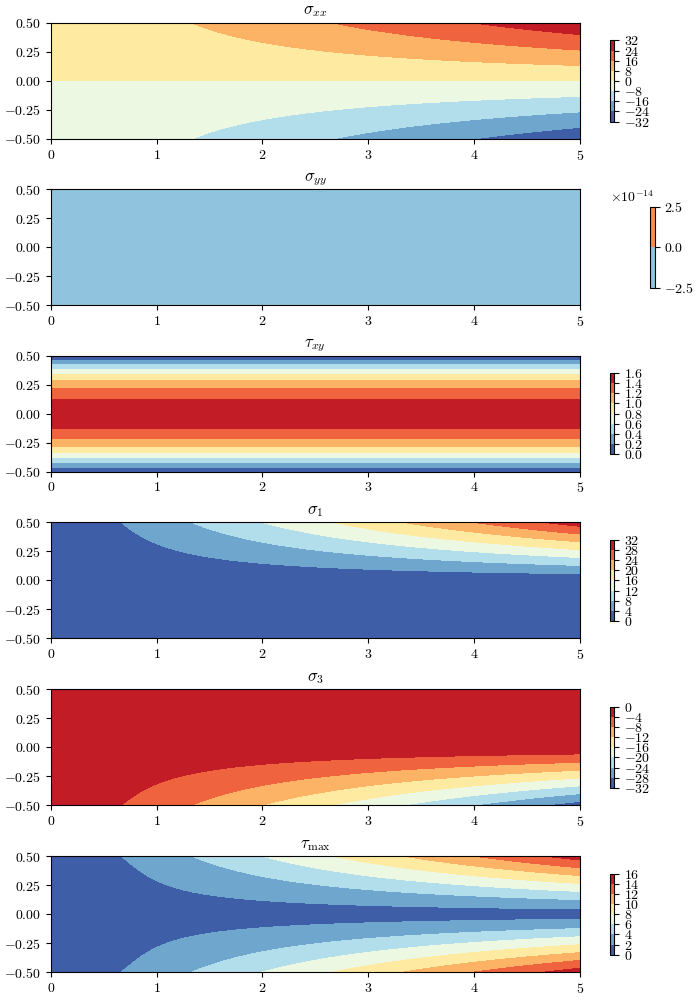

HTML(value='<style> div.jupyter-widgets.widget-label {display: none;} </style>')

In [5]:
# Nodes
xx , yy = np.meshgrid(np.linspace(0 , l , 100), np.linspace(-0.5*h, 0.5*h, 100))

# Solver
stress_fields = beam_stress_fields(xx , yy, load, h, l)
𝜎_xx , 𝜎_yy , 𝜏_xy , 𝜎_1 , 𝜎_3 , 𝜎_m, 𝜏_max = stress_fields.values()

# Visualization
titles = ["$\sigma_{xx}$", "$\sigma_{yy}$", "$\\tau_{xy}$", "$\sigma_{1}$", "$\sigma_{3}$", "$\\tau_\mathrm{max}$"]
plot_field(xx , yy, [𝜎_xx , 𝜎_yy , 𝜏_xy , 𝜎_1 , 𝜎_3 , 𝜏_max], titles=titles, figsize=[7, 10])

In [7]:
wid = interact(  # Interactive widgets
    stress_at_a_value,
    x = wgt.BoundedFloatText(value=3, min=0, max=l, step=0.5, description='x [m]:'),
    y = wgt.BoundedFloatText(value=-0.5, min=-0.5*h, max=0.5*h, step=0.1, description='y [m]'),
    load = wgt.FloatText(value=-1, description='load [N]:'),
    h = wgt. BoundedFloatText(value=1, min=0.01, step=0.5, description='h [m]:'),
    l = wgt. BoundedFloatText(value=5, min=0.01, step=0.5, description='l [m]:'),
    field = wgt.Dropdown(options=['𝜎_xx', '𝜎_yy', '𝜏_xy', '𝜎_1', '𝜎_3', '𝜎_m', '𝜏_max'],
        value='𝜏_max', description='field:'),
)

interactive(children=(BoundedFloatText(value=3.0, description='x [m]:', max=5.0, step=0.5), BoundedFloatText(v…